In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'lab-3-12-classes:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4757651%2F8072381%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240427%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240427T211314Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9c95faaeb4fd1e6badbe34c8ef34882c5282452ff941d6e7adb8c32bbcf3a46c76fc652d2164c6db889aa763575a1623a32b963a145d604d781f15afd2bc9519ab5503ff21e2d4571e42b8636949befe53a65d29b9f3ca991035aa6aeb42d55f7768a288875d3f8dd3c817ca9b46195b48b91d794df6810e5ac043046ff21ef831b74fc4eff2f94820ab12a2faf138c17119243029c1fbf3c7e2b3aabf5da6eba82ff36729b6898f8e3402fdc9a6cba5b84843a1c273c458a7038866fb8ee123d0b65ac7bec35db5d1736af997e5fff27744eee1f30f26455d4dbd87b5956b08085b054dffa330fa2b2101a5779ad0a52c0e0c74f40dfe339c1f814586ea5e1a'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 408692062 bytes downloaded
Downloaded and uncompressed: lab-3-12-classes
Data source import complete.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import *
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split


sns.set_theme()

dataset_path = Path('/kaggle/input/lab-3-12-classes')

files = dataset_path.rglob('*.jpg')
files

samples = []

for f in files:
    if not f.is_file():
        continue

    samples.append({
        'path': str(f),
        'label': f.name,
        'split': f.parent.parent.name
    })

df = pd.DataFrame(samples)
df



,path,label,split
0,/kaggle/input/lab-3-12-classes/0007/007099.jpg,007099.jpg,lab-3-12-classes
1,/kaggle/input/lab-3-12-classes/0007/007804.jpg,007804.jpg,lab-3-12-classes
2,/kaggle/input/lab-3-12-classes/0007/007078.jpg,007078.jpg,lab-3-12-classes
3,/kaggle/input/lab-3-12-classes/0007/007044.jpg,007044.jpg,lab-3-12-classes
4,/kaggle/input/lab-3-12-classes/0007/007230.jpg,007230.jpg,lab-3-12-classes
...,...,...,...
39995,/kaggle/input/lab-3-12-classes/0002/002251.jpg,002251.jpg,lab-3-12-classes
39996,/kaggle/input/lab-3-12-classes/0002/002380.jpg,002380.jpg,lab-3-12-classes
39997,/kaggle/input/lab-3-12-classes/0002/002942.jpg,002942.jpg,lab-3-12-classes
39998,/kaggle/input/lab-3-12-classes/0002/002960.jpg,002960.jpg,lab-3-12-classes


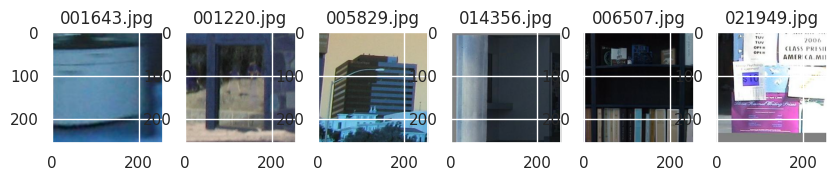

In [ ]:
random_samples = df.sample(6)

fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(10,4))

for _ax, (idx, row) in zip(ax, df.sample(6).iterrows()):
    img = cv2.imread(row.path)
    _ax.imshow(img)
    _ax.set_title(row.label)

In [ ]:
annotations = pd.read_csv("/kaggle/input/lab-3-12-classes/annotations.csv", index_col=0)
annotations

,name,human,vehicle,property,opening,plant,signal,entry,furniture,seat,desk,buttons,fore
0,000000.jpg,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,000001.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,000002.jpg,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,000003.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,000004.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39986,039986.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39988,039988.jpg,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39990,039990.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39992,039992.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import os
image_path = []
for index, row in annotations.iterrows():
    image_name = row["name"]
    path = os.path.join("/kaggle/input/lab-3-12-classes", "0" + image_name[:3], image_name)
    image_path.append(path)


df = annotations.copy()
df["name"] = image_path

df

,name,human,vehicle,property,opening,plant,signal,entry,furniture,seat,desk,buttons,fore
0,/kaggle/input/lab-3-12-classes/0000/000000.jpg,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/kaggle/input/lab-3-12-classes/0000/000001.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/kaggle/input/lab-3-12-classes/0000/000002.jpg,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/kaggle/input/lab-3-12-classes/0000/000003.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/kaggle/input/lab-3-12-classes/0000/000004.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39986,/kaggle/input/lab-3-12-classes/0039/039986.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39988,/kaggle/input/lab-3-12-classes/0039/039988.jpg,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39990,/kaggle/input/lab-3-12-classes/0039/039990.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39992,/kaggle/input/lab-3-12-classes/0039/039992.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
class_columns = [column for column in df.columns if column != "name"]
df_train, df_test = train_test_split(df, test_size=0.2)
df_train.shape
class_columns

['human',
 'vehicle',
 'property',
 'opening',
 'plant',
 'signal',
 'entry',
 'furniture',
 'seat',
 'desk',
 'buttons',
 'fore']

(256, 256, 3) <dtype: 'float32'>


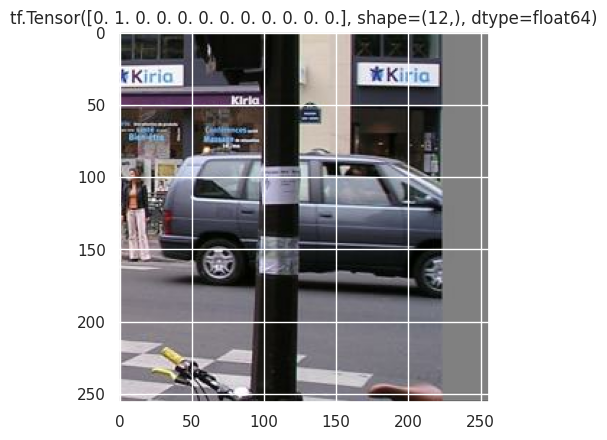

In [ ]:
def make_dataset(df_to_use, flatten=True, batch_size=None):
    path_list = df_to_use.name

    ds_x = tf.data.Dataset.from_tensor_slices(path_list)
    ds_x = ds_x.map(lambda x: tf.io.read_file(x))
    ds_x = ds_x.map(lambda x: tf.image.decode_png(x))
    ds_x = ds_x.map(lambda x: x / 255)
    ds_x = ds_x.map(lambda x: tf.reshape(x, (256, 256, 3)))



    ds_y = tf.data.Dataset.from_tensor_slices(df_to_use[class_columns])

    ds = tf.data.Dataset.zip((ds_x, ds_y))

    if batch_size:
        ds = ds.batch(batch_size, drop_remainder=True)
    return ds


train_ds = make_dataset(df_train, batch_size=32)
test_ds = make_dataset(df_test, batch_size=32)
train_ds

for sample in train_ds.take(1):  # take one batch
    imgs, labels = sample
    for img, label in zip(imgs, labels):  # iterate over each image and label in the batch
        print(img.shape, img.dtype)
        plt.imshow(img)
        plt.title(str(label))
        plt.show()  # display the plot
        break


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(12, activation='softmax'),
])


train_ds_2d = make_dataset(df_train, batch_size=32, flatten=False)
test_ds_2d = make_dataset(df_test, batch_size=32, flatten=False)
# train_ds_2d

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#
model.fit(train_ds_2d, validation_data=test_ds_2d, epochs=3)

Epoch 1/3
500/500 [==============================] - 55s 103ms/step - loss: 1.5915 - accuracy: 0.5039 - val_loss: 1.1713 - val_accuracy: 0.6440
Epoch 2/3
500/500 [==============================] - 49s 99ms/step - loss: 1.0975 - accuracy: 0.6644 - val_loss: 0.8693 - val_accuracy: 0.7245
Epoch 3/3
500/500 [==============================] - 51s 101ms/step - loss: 0.8696 - accuracy: 0.7236 - val_loss: 0.7986 - val_accuracy: 0.7550


In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(12, activation='softmax'),
])

train_ds_2d = make_dataset(df_train, batch_size=32, flatten=False)
test_ds_2d = make_dataset(df_test, batch_size=32, flatten=False)
# train_ds_2d

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#
model.fit(train_ds_2d, validation_data=test_ds_2d, epochs=4)


Epoch 1/4
500/500 [==============================] - 52s 97ms/step - loss: 1.7195 - accuracy: 0.4446 - val_loss: 1.1126 - val_accuracy: 0.6547
Epoch 2/4
500/500 [==============================] - 48s 95ms/step - loss: 1.1059 - accuracy: 0.6662 - val_loss: 0.8332 - val_accuracy: 0.7370
Epoch 3/4
500/500 [==============================] - 48s 96ms/step - loss: 0.8208 - accuracy: 0.7442 - val_loss: 0.7816 - val_accuracy: 0.7535
Epoch 4/4
500/500 [==============================] - 46s 92ms/step - loss: 0.6791 - accuracy: 0.7855 - val_loss: 0.8301 - val_accuracy: 0.7653


In [ ]:
model.summary()
model.save('/kaggle/working/model.keras')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (32, 254, 254, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (32, 252, 252, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2  (32, 126, 126, 16)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (32, 124, 124, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (32, 122, 122, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 61, 61, 32)          0         
 g2D)                                                   